C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Accuracy Score: 0.844
Precision: 0.6
Recall: 0.6183206106870229

Confusion Matrix:
[[1445  162]
 [ 150  243]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.60      0.62      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.85      0.84      0.84      2000



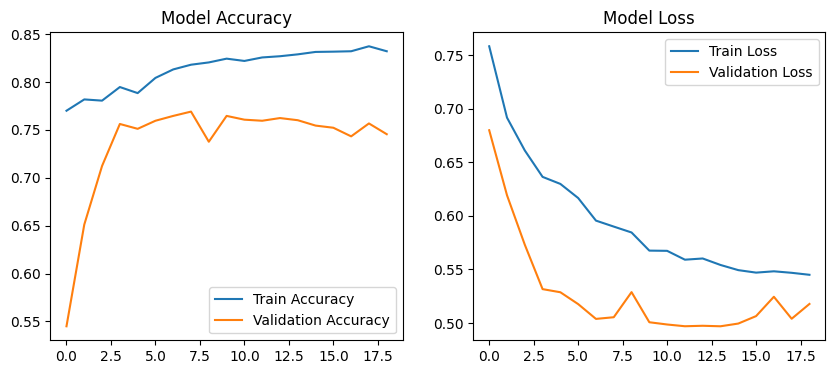

In [15]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Step 2: Read the dataset
data = pd.read_csv("Churn_Modelling.csv")

# Drop columns that do not help in prediction
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

# Convert categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 4: Apply SMOTE with controlled sampling
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 5: Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Build Neural Network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Use Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ✅ Step 7: Increase class weight to boost RECALL
class_weights = {0: 1, 1: 2}

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32,
                    callbacks=[early_stop], class_weight=class_weights, verbose=0)

# Step 8: Predict probabilities
y_prob = model.predict(X_test)

# ✅ Step 9: Lower threshold to increase RECALL
threshold = 0.5
y_pred = (y_prob > threshold).astype(int)

# Step 10: Evaluate results
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 11: Plot Training Curves
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.legend()

plt.show()